In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [355]:
df = pd.read_csv("bestsellers with categories.csv")
df.columns = ['name', 'author', 'user_rating', 'reviews', 'price', 'year', 'genre']
df.head()


,name,author,user_rating,reviews,price,year,genre
0,10-Day Green Smoothie Cleanse,JJ Smith,4.7,17350,8,2016,Non Fiction
1,11/22/63: A Novel,Stephen King,4.6,2052,22,2011,Fiction
2,12 Rules for Life: An Antidote to Chaos,Jordan B. Peterson,4.7,18979,15,2018,Non Fiction
3,1984 (Signet Classics),George Orwell,4.7,21424,6,2017,Fiction
4,"5,000 Awesome Facts (About Everything!) (Natio...",National Geographic Kids,4.8,7665,12,2019,Non Fiction


# Первинне дослідження даних

In [356]:
df.shape

(550, 7)

Про скільки книг зберігає дані датасет?
Відповідь: 351

In [357]:
df['name'].nunique()

351

Чи є в якихось змінних пропуски? (Так / ні)
Відповідь: Hi

In [358]:
df.isna().sum()

name           0
author         0
user_rating    0
reviews        0
price          0
year           0
genre          0
dtype: int64

Які є унікальні жанри?
Відповідь: 'Non Fiction', 'Fiction'

([<matplotlib.patches.Wedge at 0x1571aa1eed0>,
 [Text(-0.21844961316685352, 1.0780907969680718, 'Non Fiction'),
  Text(0.21844970741654726, -1.0780907778705953, 'Fiction')],
 [Text(-0.11915433445464736, 0.5880495256189482, '56.4%'),
  Text(0.11915438586357122, -0.5880495152021428, '43.6%')])

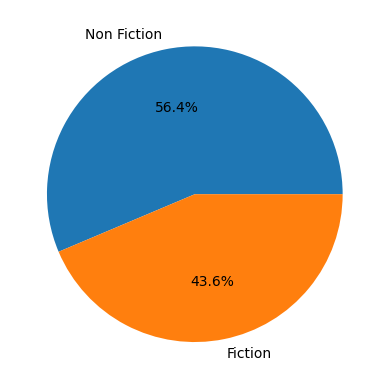

In [ ]:
df['genre'].unique()
genre_counts = df['genre'].value_counts()
fig, ax = plt.subplots()
ax.pie(genre_counts, labels=genre_counts.index, autopct='%1.1f%%')

<Axes: xlabel='price', ylabel='Count'>

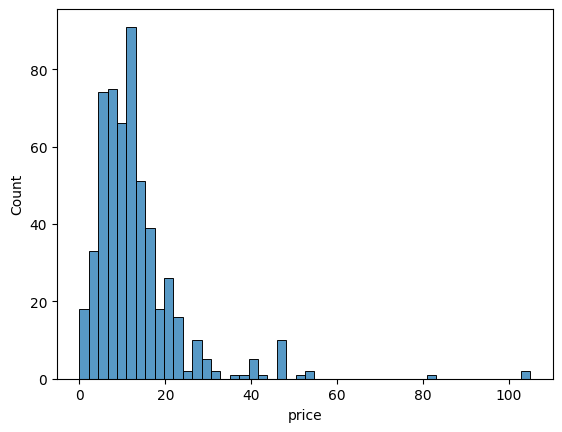

In [ ]:
sns.histplot(x=df["price"])

Максимальна ціна?
Відповідь: 0

Мінімальна ціна?
Відповідь: 105

Середня ціна?
Відповідь: 13.1

Медіанна ціна?
Відповідь: 11

In [ ]:
price_df = df["price"]

print("Min:", price_df.min())
print("Max:", price_df.max())
print("Mean:", price_df.mean())
print("Median:", price_df.median())



Min: 0
Max: 105
Mean: 13.1
Median: 11.0


# Пошук та сортування даних

Який рейтинг у датасеті найвищий?
Відповідь: 4.9

In [ ]:
max_rating = df["user_rating"].max()
print(max_rating)

4.9


Скільки книг мають такий рейтинг?
Відповідь: 52

In [ ]:
df[df["user_rating"] == max_rating].shape[0]

52

Яка книга має найбільше відгуків? Відповідь: 'Where the Crawdads Sing'

In [ ]:
df.loc[df["reviews"].idxmax(), "name"]

'Where the Crawdads Sing'

З тих книг, що потрапили до Топ-50 у 2015 році, яка книга найдорожча (можна використати проміжний датафрейм)? 

Відповідь: Publication Manual of the American Psychological Association, 6th Edition

In [ ]:

books_2015 = df[df["year"] == 2015]
books_2015_sorted = books_2015.sort_values(by="user_rating", ascending=False)
top50_2015 = books_2015_sorted.head(50)

most_expensive_book = top50_2015.loc[top50_2015["price"].idxmax()]

display(most_expensive_book)


name           Publication Manual of the American Psychologic...
author                        American Psychological Association
user_rating                                                  4.5
reviews                                                     8580
price                                                         46
year                                                        2015
genre                                                Non Fiction
Name: 277, dtype: object

Скільки книг жанру Fiction потрапили до Топ-50 у 2010 році (використовуйте &)? 

Відповідь: 20

In [ ]:
df[(df["genre"] == "Fiction") & (df["year"] == 2010) & (df["user_rating"] <= 50)].shape[0]

20

Скільки книг з рейтингом 4.9 потрапило до рейтингу у 2010 та 2011 роках (використовуйте | або функцію isin)?

 Відповідь:1


In [ ]:
df[(df["user_rating"] == 4.9) & ((df["year"] == 2010) | (df["year"] == 2011))].shape[0]

1

Яка книга остання у відсортованому списку? Відповідь: Old School (Diary of a Wimpy Kid #10)

In [ ]:
filtered_books = df[(df["year"] == 2015) & (df["price"] < 8)]
sorted_books = filtered_books.sort_values(by="price", ascending=True)
last_book = sorted_books.iloc[-1]["name"]
print(last_book)

Old School (Diary of a Wimpy Kid #10)


# Агрегування даних та з'єднання таблиць

In [ ]:
price_stats = df.groupby("genre")["price"].agg(["min", "max"])

Максимальна ціна для жанру Fiction: 82

In [ ]:
print(price_stats.loc["Fiction", "max"])

82


Мінімальна ціна для жанру Fiction: 0

In [ ]:
print(price_stats.loc["Fiction", "min"])

0


Максимальна ціна для жанру Non Fiction: 105

In [ ]:
print(price_stats.loc["Non Fiction", "max"])

105


Мінімальна  ціна для жанру Non Fiction:

In [ ]:
print(price_stats.loc["Non Fiction", "min"])

0


In [ ]:
new_df = df.groupby("author")["name"].agg("count").reset_index()
new_df.columns = ["author", "book_count"]

Якої розмірності вийшла таблиця? Відповідь: 248

In [ ]:
new_df.shape[0]

248

Який автор має найбільше книг? Відповідь:'Jeff Kinney'

In [ ]:
sorted_df = new_df.sort_values(by="book_count", ascending=False)
sorted_df.iloc[0]["author"]

'Jeff Kinney'

Який автор має найбільше книг? Відповідь: 12

In [ ]:
print(sorted_df.iloc[0]["book_count"])

12


In [ ]:
author_avg_rating = df.groupby("author")["user_rating"].agg("mean").reset_index()
author_avg_rating.columns = ["author", "avg_rating"]

У якого автора середній рейтинг мінімальний? Відповідь: 'Donna Tartt'

In [ ]:
author_avg_rating_sorted = author_avg_rating.sort_values(by="avg_rating", ascending=True)
author_avg_rating_sorted.iloc[0]["author"]

'Donna Tartt'

Який у цього автора середній рейтинг? Відповідь: 3.9

In [ ]:
print(author_avg_rating.loc[author_avg_rating["author"] == author_avg_rating_sorted.iloc[0]["author"], "avg_rating"].values[0])


3.9


In [ ]:

avg_idx = author_avg_rating.set_index("author")
cnt_idx = new_df.set_index("author")
author_stat = pd.concat([cnt_idx, avg_idx], axis=1).reset_index()
author_stat = author_stat.sort_values(by=["book_count", "avg_rating"], ascending=[True, True])

Який автор перший у списку?  'Muriel Barbery'

In [ ]:
author_stat.iloc[0]["author"]

'Muriel Barbery'